In [2]:
from datasets import load_dataset

dataset = load_dataset("MemGPT/MSC-Self-Instruct")

In [5]:
dataset['train']['dialog']

[[{'text': 'I won my fight today.',
   'id': 'Speaker 1',
   'convai2_id': 'valid_1',
   'rating': None},
  {'text': "nice! do you feel better? I know you've been losing some fights recently.",
   'id': 'Speaker 2',
   'convai2_id': 'valid_1',
   'rating': None},
  {'text': 'I am. I am really trying to learn from those loses, and it seems to be paying off in practices. AND TODAY! What a fight!!!',
   'id': 'Speaker 1',
   'convai2_id': 'valid_1',
   'rating': None},
  {'text': "That's exciting! Was it a close fight or did you dominate haha",
   'id': 'Speaker 2',
   'convai2_id': 'valid_1',
   'rating': None},
  {'text': "You had to ask, didn't you?! I jest. But it was very close. I was worried I was going to lose at first, but I just stayed focused and in the moment. It really is all about trusting your instincts and not getting in your own way. ",
   'id': 'Speaker 1',
   'convai2_id': 'valid_1',
   'rating': None},
  {'text': "That is true.  A win's a win.  I'm glad you didn't get i

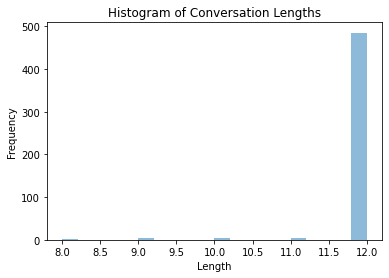

Turn 1: I won my fight today.
Turn 2: nice! do you feel better? I know you've been losing some fights recently.
Turn 3: I am. I am really trying to learn from those loses, and it seems to be paying off in practices. AND TODAY! What a fight!!!
Turn 4: That's exciting! Was it a close fight or did you dominate haha
Turn 5: You had to ask, didn't you?! I jest. But it was very close. I was worried I was going to lose at first, but I just stayed focused and in the moment. It really is all about trusting your instincts and not getting in your own way. 
Turn 6: That is true.  A win's a win.  I'm glad you didn't get into your own head when it was close... maybe you'll be able to get some more wins after this.
Turn 7: I sure hope so. This fight paid $5,000!
Turn 8: that's amazing! I wouldn't have expected it to pay that much.  Maybe I should get into fighting haha
Turn 9: Hahahaha the money can be good. It really depends on the tournament. Or private hirings, like parties, they pay well, but som

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate conversation lengths
conversation_lengths = [len(dialog) for dialog in dataset['train']['dialog']]

# Plot histogram of conversation lengths
plt.hist(conversation_lengths, bins=20, alpha=0.5)
plt.title('Histogram of Conversation Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plot an example conversation
example_conversation = dataset['train']['dialog'][0]
for i, turn in enumerate(example_conversation):
    print(f"Turn {i+1}: {turn['text']}")

# Include the question answer pair (self_instruct) column
print("\nSelf Instruct: ", dataset['train']['self_instruct'][0])


In [9]:
import json

# Explore the "previous_dialogues" column
previous_dialogues = dataset['train']['previous_dialogs']

# Print the first 5 previous dialogues
for i in range(5):
    print(f"Previous Dialogue {i+1}: {json.dumps(previous_dialogues[i], indent=4)}")

Previous Dialogue 1: [
    {
        "personas": [
            [
                "I volunteer in my spare time.",
                "I work in a homeless shelter in my town.",
                "I'm not into cars. I wrestle for my day job.",
                "I like wrestling. I like crowds and meeting people.",
                "I work out a few times each week when I need to be alone.",
                "I like country music a little bit. I like Taylor Swift."
            ],
            [
                "I have two dogs.",
                "I have two older mustangs.",
                "I like vintage cars.",
                "I don't like crowds.",
                "I like working out.",
                "I like classic country."
            ]
        ],
        "dialog": [
            {
                "text": "Hi! How are you doing tonight?"
            },
            {
                "text": "I'm doing great. Just relaxing with my two dogs."
            },
            {
                "te

# let's make a sample prompt

In [15]:
previous_dialogues = dataset['train']['previous_dialogs'][0]

with open('dialogues.txt', 'w') as f:
    for dialogue in previous_dialogues:
        conversation = dialogue['dialog']
        for i, turn in enumerate(conversation):
            speaker = 'A' if i % 2 == 0 else 'B'
            f.write(f"{speaker}: \"{turn['text']}\"\n")

    f.write("\nWhat would A respond to this: " + dataset['train']['self_instruct'][0]['B'] + "\n")

In [16]:
for instruction in dataset['train']['self_instruct']:
    print(instruction['B'])

Hey, remember that time we talked about music? What was the artist you mentioned you could get into?
Hey, remember that time we talked about our jobs and expenses? What was that one thing you said you did to save money?
Hey, remember that time we talked about our work lives? What was that field you said you used to work in?
Hey, remember that time we talked about our studies and working part-time? What was the fast food place you said you're working at?
Hey, remember that time we talked about our favorite ways to relax? What was the distance you mentioned you liked to walk for a small workout?
Hey, remember that time we talked about our pets? What kind of pet do you have?
Hey, remember that time we talked about our favorite movies? What was yours?
Hey, remember that time we talked about your pet? What kind of animal is it?
Hey, remember that time we talked about your hobbies? How old were you when you first learned to play guitar?
Hey, remember that time we talked about our post-retire